In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv("labeled_data.csv")

In [5]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [7]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [11]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [13]:
dataset["labels"] = dataset["class"].map({0:"Hate Speech",
                                        1:"Offensive Language",
                                        2:"no hate or offensive language"})

In [15]:
data = dataset[["tweet","labels"]]

In [17]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,no hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",no hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [19]:
import re
import nltk
import string as string 

In [20]:
from nltk.corpus import stopwords 
stopwords = set(stopwords.words("english"))

In [21]:
import nltk
from nltk.stem.snowball import SnowballStemmer

# Create a Snowball stemmer for English
snow_stemmer = SnowballStemmer(language='english')


In [25]:
stemmer = nltk.SnowballStemmer("english")

In [27]:
def clean_data(text):
    text = str(text).lower()
    text = re.sub('http?:S+|www.S+','',text)
    text = re.sub('[.*?]','',text)
    text = re.sub('<.*?>+','',text)
    text= re.sub('[%s]' %re.escape(string.punctuation),'',text)
    text =re.sub('n','',text)
    text =re.sub('w*d w*','',text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [29]:
data["tweet"]=data["tweet"].apply(clean_data)

C:\Users\sunny\AppData\Local\Temp\ipykernel_20396\2823468588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]=data["tweet"].apply(clean_data)


In [30]:
data

,tweet,labels
0,rt mayasolov woma shouldt complai cleaig hous...,no hate or offensive language
1,rt mleew17 boy dat coldtyga dw bafor cuffi da...,Offensive Language
2,rt urkidofbradawg rt 80sbaby4lif ever fuck bi...,Offensive Language
3,rt cgaderso vivabasesh look like tray,Offensive Language
4,rt sheikarobert shit hear might true might fa...,Offensive Language
...,...,...
24778,yous muthafi lie 8220lifeaskig 20pearl coreyem...,Offensive Language
24779,youv goe abrok wrog heart babi adrov redeck crazi,no hate or offensive language
24780,youg buck waa eat dat igguh like ait fucki dis...,Offensive Language
24781,youu got wilbitch telli lie,Offensive Language


In [33]:
 X =np.array(data["tweet"])
y =np.array(data["labels"])

In [35]:
X

array([' rt mayasolov woma shouldt complai cleaig hous amp shoulalway take trash',
       ' rt mleew17 boy dat coldtyga dw bafor cuffi dat hoe 1st place',
       ' rt urkidofbradawg rt 80sbaby4lif ever fuck bitch ash start cri cofusea shit',
       ..., 'youg buck waa eat dat igguh like ait fucki dis agai',
       'youu got wilbitch telli lie',
       'ruffl tac eile dahlia  beauti color combiatio pik orag yellow amp white coll httptcoh0dyebvzb'],
      dtype=object)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [39]:
cv= CountVectorizer()
X=cv.fit_transform(X)

In [41]:
X

<24783x43919 sparse matrix of type '<class 'numpy.int64'>'
	with 217450 stored elements in Compressed Sparse Row format>

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
X_train, X_test, y_train, y_test  =train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
X_train

<16604x43919 sparse matrix of type '<class 'numpy.int64'>'
	with 145761 stored elements in Compressed Sparse Row format>

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred= dt.predict(X_test)

In [55]:
from sklearn.metrics import  confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[ 111,  321,   33],
       [ 185, 5958,  192],
       [  33,  391,  955]], dtype=int64)

In [57]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

<Axes: >

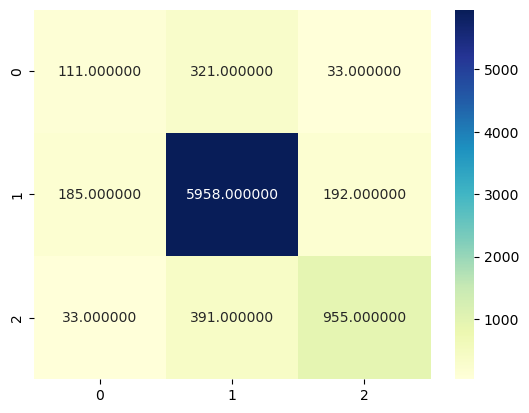

In [63]:
sns.heatmap(cm, annot = True, fmt="f",cmap="YlGnBu")

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8587846925051962

In [91]:
sample = "let's unite and save the nation from pollution"
sample  = clean_data(sample)

In [93]:
sample

'let uit asav atio pollutio'

In [95]:
data1=cv.transform([sample]).toarray()

In [97]:
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [99]:
dt.predict(data1)

array(['Offensive Language'], dtype=object)